### Run the saved model.
This code will eventually be used to run the model on new inputs given from a web app.

In [108]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import tensorflow as tf
#from PIL import Image
import numpy as np
import cv2
import os

In [109]:
# set the path to your dataset
test_dir = './image_scrape_code/test_images'

# append dir and folder name into a list 
test_image_files = [
    os.path.join(test_dir, filename)
    for filename in os.listdir(test_dir)
    if filename.endswith((".jpg", ".png", ".gif"))
]
print(len(test_image_files))

8


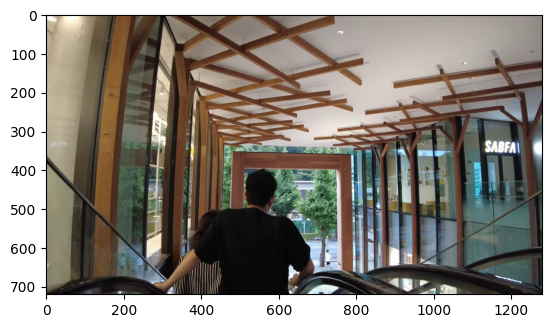

In [126]:
image = test_image_files[4]
img = cv2.imread(image)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [127]:
resize = cv2.resize(img, (256,256))
resized_image = resize / 255.0 #normalize pixel values
resized_image = np.expand_dims(resized_image, axis=0) #expand dimensions to match model input shape


In [128]:
model = load_model('models/person_in_img_classifier.h5')


In [129]:
#the no.expand puts into another array. Our model expects a batch not a sinlge image
prediction = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 88ms/step


In [130]:
prediction

array([[0.68235517]], dtype=float32)

./image_scrape_code/test_images/test-person-screenshot-2024-01-28T06-06-38.732Z.png has a person in it


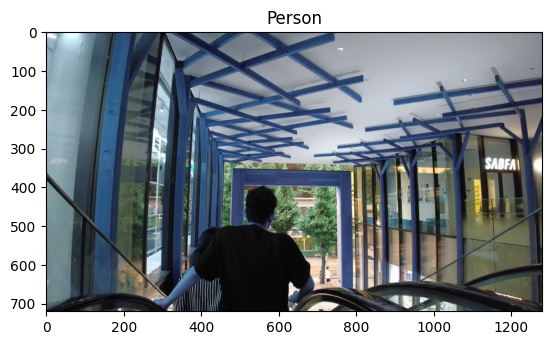

In [131]:
if prediction > 0.5:
    print(f'{image} has a person in it')
    title = "Person"
else:
     print(f'{image} has no person in it')
     title = "No Person"

plt.imshow(img)
plt.title(title)
plt.show()